In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
dataset = pd.read_csv("Social_Network_Ads.csv").values
X = dataset[:, :-1]
y = dataset[:, -1]

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [36]:
from sklearn.svm import SVC

classifier = SVC(kernel = "linear")
classifier.fit(X_train_sc, y_train)

SVC(kernel='linear')

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = classifier.predict(X_test_sc)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(acc)
print(cm)

0.8
[[58  2]
 [18 22]]


In [38]:
print(classifier.coef_)
print(classifier.intercept_)

[[1.65263885 0.89010903]]
[-0.92179724]


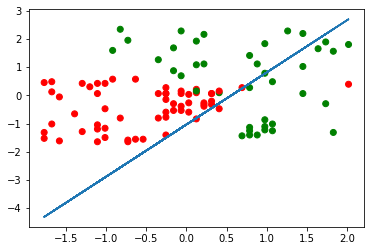

In [44]:
colors = ["green" if label == 1 else "red" for label in y_test]
fig, ax = plt.subplots()
ax.scatter(X_test_sc[:, 0], X_test_sc[:, 1], c = colors)

coefs = classifier.coef_[0]
intercept = classifier.intercept_[0]
x1 = X_test_sc[:, 0]
x2 = (intercept + x1 * coefs[0]) / coefs[1]
ax.plot(x1, x2)